### *Time Series Analysis on the data International Airline passengers  from 1940 to 1960.*

NLTK stands for Natural Language Toolkit. It is a popular Python library for working with human language data, such as text and speech. NLTK provides a wide range of tools and resources for tasks such as tokenization, stemming, tagging, parsing, and machine learning for natural language processing. It is widely used in academia and industry for research and development in the field of computational linguistics and natural language processing.

In [38]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # for advanced data visualization
from statsmodels.tsa.seasonal import seasonal_decompose # for trend, seasonality and residuals

In [39]:
# data fetch from github
import pandas as pd
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url)  # read csv file from github
df.head() # show first 5 rows

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


The first line of code imports the Pandas library, which is a popular Python library for data manipulation and analysis. Pandas provides powerful data structures for working with structured data, such as tables and time series data. The `pd.read_csv` function is a Pandas function that reads a CSV file and returns a DataFrame, which is a two-dimensional table-like data structure.

The second line of code imports the NumPy library, which is a popular Python library for numerical computing. NumPy provides powerful tools for working with arrays and matrices, which are useful for scientific computing and data analysis.

The third line of code imports the Matplotlib library, which is a popular Python library for data visualization. Matplotlib provides a wide range of tools for creating static and interactive visualizations of data, such as line charts, scatter plots, and histograms.

The fourth line of code imports the Seaborn library, which is a Python library for advanced data visualization. Seaborn provides a high-level interface for creating complex visualizations, such as heatmaps, pair plots, and violin plots.

The fifth line of code imports the seasonal_decompose function from the statsmodels.tsa.seasonal module. This function is used for decomposing a time series into its trend, seasonality, and residuals components. This is a common technique in time series analysis for understanding the underlying patterns and trends in the data.

Also, these libraries provide a powerful set of tools for working with time series data in Python. With these tools, we can load, manipulate, visualize, and analyze time series data to gain insights and make predictions.

In [40]:
df.shape # a row and a column

(144, 2)


`url` that contains the URL of a CSV file on GitHub. This file contains data on airline passengers over time, which is a common example of time series data.

Also we used the `pd.read_csv()` function from Pandas to read the CSV file from the URL and return a DataFrame, which is a two-dimensional table-like data structure. The DataFrame is assigned to a variable called `df`.

Then we used the `head()` method on the DataFrame to show the first 5 rows of the data. This is a common way to quickly inspect the data and get a sense of its structure and content.

Overall, this code fetches time series data from a CSV file on GitHub using Pandas, which is a popular Python library for data manipulation and analysis. With this data, we can use a variety of tools and techniques to analyze and visualize the data, such as plotting the data over time, decomposing the data into its trend and seasonal components, and making predictions about future values.

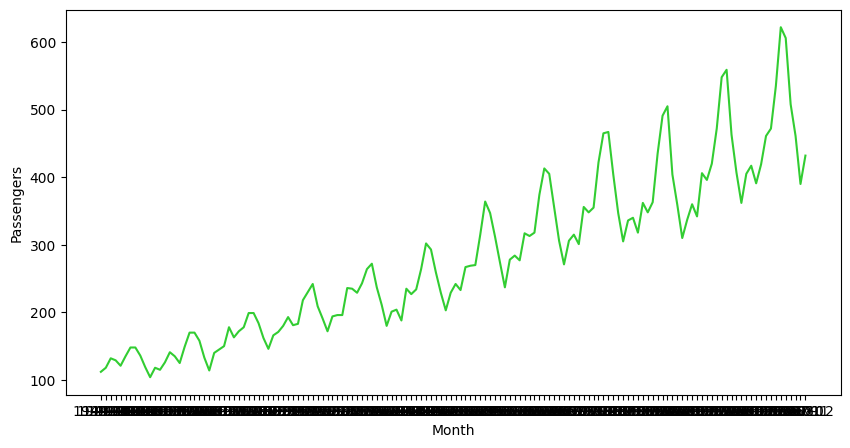

In [41]:
# plot this data to see trends and seasonality
plt.figure(figsize=(10, 5))  # set the figure size
sns.lineplot(x='Month', y='Passengers', data=df, color='limegreen') # plot the data
plt.show() # show the plot

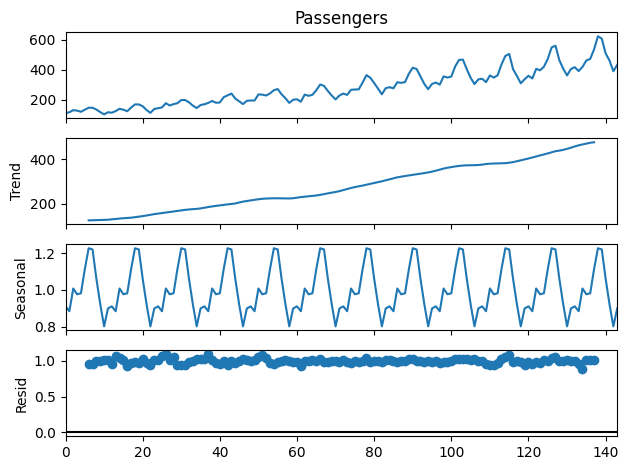

In [42]:
# decompose the data into trend, seasonality and residuals 
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative', period=12) # multiplicative model
decomposition.plot() # plot the decomposition 
plt.show()

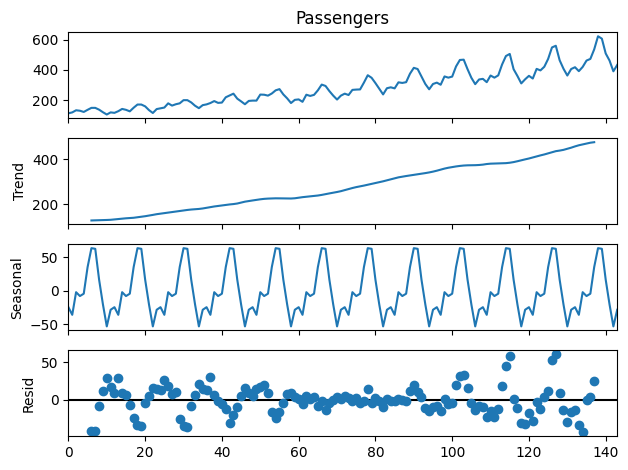

In [43]:
decomposition = seasonal_decompose(df['Passengers'], model='additive', period=12) # additive model
decomposition.plot() # plot the decomposition
plt.show() # show the plot

In [44]:
decompose=seasonal_decompose(df['Passengers'],model='multiplicative',period=12)
trend=decomposition.trend # trend
seasonal=decomposition.seasonal # seasonality
residual=decomposition.resid # residuals

<AxesSubplot: >

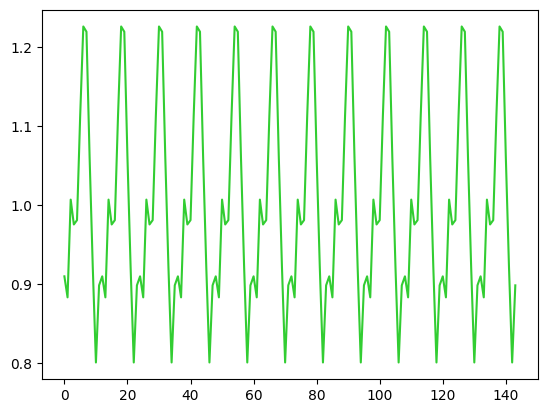

In [45]:
decompose.seasonal.plot(color='limegreen')

<AxesSubplot: >

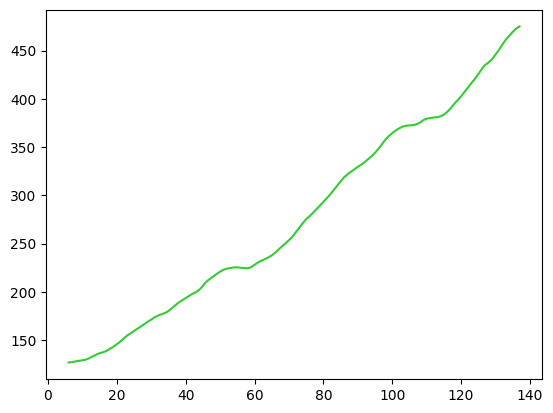

In [46]:
decompose.trend.plot(color='limegreen') # plot the trend

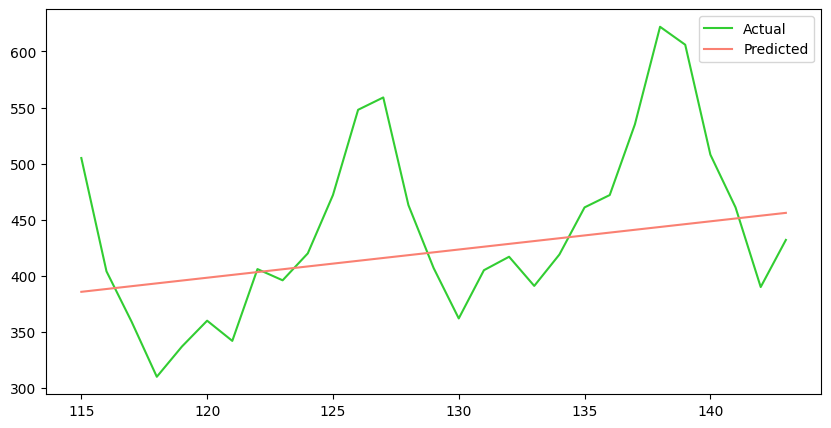

In [47]:
train_size = int(len(df) * 0.8) # 80% of data for training
train=df[:train_size] # 80% of data for training
test=df[train_size:] # 20% of data for testing
 
# fit a simple linear regression model on training data
from sklearn.linear_model import LinearRegression # import the model
model=LinearRegression() # create a model
model.fit(train.index.values.reshape(-1,1),train['Passengers']) # fit the model on training data

# predict on test data
pred=model.predict(test.index.values.reshape(-1,1)) # predict on test data

# plot the predictions
plt.figure(figsize=(10, 5)) # set the figure size
plt.plot(test.index, test['Passengers'], color='limegreen', label='Actual') # plot the actual values
plt.plot(test.index, pred, color='salmon', label='Predicted') # plot the predictions
plt.legend() # show the legend
plt.show() # show the plot

The code first defines a variable called `train_size` that represents the proportion of the data that will be used for training the model. In this case, the code is using 80% of the data for training and 20% for testing.

The code then creates two new DataFrames called `train` and `test` by splitting the original DataFrame `df` into two parts based on the `train_size` variable. The `train` DataFrame contains the first 80% of the data, and the `test` DataFrame contains the remaining 20% of the data.

The code then imports the `LinearRegression` class from the `sklearn.linear_model` module, which is a popular Python library for machine learning. The `LinearRegression` class is a simple linear regression model that fits a straight line to the data.

The code creates a new instance of the `LinearRegression` class called `model`, and then fits the model to the training data using the `fit()` method. The `fit()` method takes two arguments: the input data (in this case, the index values of the `train` DataFrame) and the output data (in this case, the `Passengers` column of the `train` DataFrame).

The code then uses the `predict()` method of the `model` object to make predictions on the test data. The `predict()` method takes the index values of the `test` DataFrame as input, and returns a NumPy array of predicted values.

Finally, the code uses Matplotlib to create a plot of the actual values and predicted values. The `plot()` function is used to plot the actual values and predicted values as two separate lines on the same plot. The `legend()` function is used to add a legend to the plot, and the `show()` function is used to display the plot.

Overall, this code demonstrates how to use a simple linear regression model to make predictions on time series data. By splitting the data into training and testing sets, the code is able to evaluate the performance of the model on unseen data. The plot of the actual values and predicted values provides a visual representation of the model's performance.

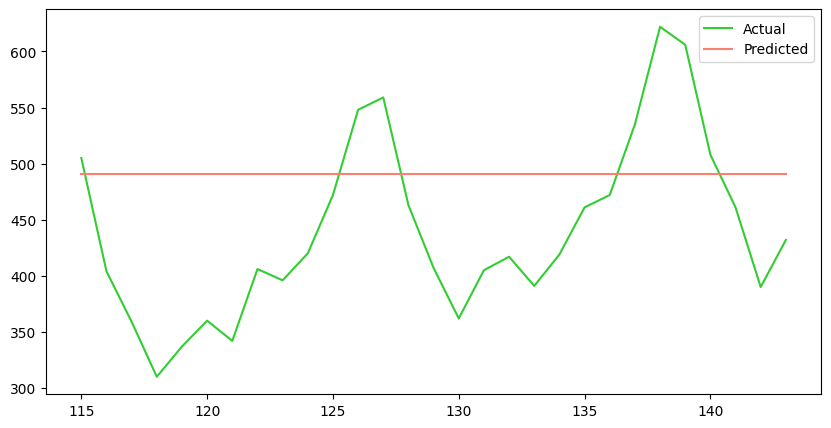

In [48]:
from xgboost import XGBRegressor # import the model
model=XGBRegressor() # create a model
model.fit(train.index.values.reshape(-1,1),train['Passengers']) # fit the model on training data

# predict on test data
pred=model.predict(test.index.values.reshape(-1,1)) # predict on test data

# plot the predictions
plt.figure(figsize=(10, 5))
plt.plot(test.index, test['Passengers'], color='limegreen', label='Actual')
plt.plot(test.index, pred, color='salmon', label='Predicted')
plt.legend()
plt.show()

The code first imports the `XGBRegressor` class from the `xgboost` module, which is a popular Python library for gradient boosting. The `XGBRegressor` class is a regression model that uses gradient boosting to fit a series of decision trees to the data.

The code creates a new instance of the `XGBRegressor` class called `model`, which will be used to make predictions on the data.

The code then fits the `model` to the training data using the `fit()` method. The `fit()` method takes two arguments: the input data (in this case, the index values of the `train` DataFrame) and the output data (in this case, the `Passengers` column of the `train` DataFrame).

The code then uses the `predict()` method of the `model` object to make predictions on the test data. The `predict()` method takes the index values of the `test` DataFrame as input, and returns a NumPy array of predicted values.

Finally, the code uses Matplotlib to create a plot of the actual values and predicted values. The `plot()` function is used to plot the actual values and predicted values as two separate lines on the same plot. The `legend()` function is used to add a legend to the plot, and the `show()` function is used to display the plot.

Overall, this code demonstrates how to use an XGBoost regression model to make predictions on time series data. By fitting the model to the training data and making predictions on the test data, the code is able to evaluate the performance of the model on unseen data. The plot of the actual values and predicted values provides a visual representation of the model's performance.

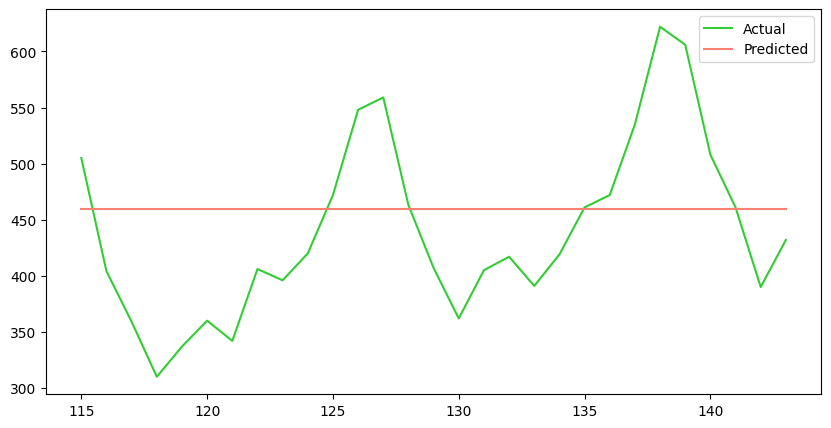

In [49]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor # import the model
model=RandomForestRegressor() # create a model
model.fit(train.index.values.reshape(-1,1),train['Passengers']) # fit the model on training data
params={
    'n_estimators':[100,200,300,400,500],
    'max_depth':[3,4,5,6,7,8,9,10],
    'min_samples_split':[2,3,4,5,6,7,8,9,10],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]
}
# predict on test data
pred=model.predict(test.index.values.reshape(-1,1)) # predict on test data

# plot the predictions
plt.figure(figsize=(10, 5))
plt.plot(test.index, test['Passengers'], color='limegreen', label='Actual')
plt.plot(test.index, pred, color='salmon', label='Predicted')
plt.legend()
plt.show()

Epoch 1/100
103/103 - 17s - loss: 70397.6094 - val_loss: 218203.0312 - 17s/epoch - 168ms/step
Epoch 2/100
103/103 - 1s - loss: 68274.1406 - val_loss: 212829.5469 - 1s/epoch - 11ms/step
Epoch 3/100
103/103 - 1s - loss: 65570.2969 - val_loss: 208965.2031 - 1s/epoch - 12ms/step
Epoch 4/100
103/103 - 1s - loss: 63832.4062 - val_loss: 206033.8125 - 1s/epoch - 13ms/step
Epoch 5/100
103/103 - 2s - loss: 62440.8945 - val_loss: 203349.2500 - 2s/epoch - 15ms/step
Epoch 6/100
103/103 - 1s - loss: 61027.7617 - val_loss: 200757.7500 - 1s/epoch - 13ms/step
Epoch 7/100
103/103 - 1s - loss: 59751.9062 - val_loss: 198246.4688 - 1s/epoch - 12ms/step
Epoch 8/100
103/103 - 1s - loss: 58173.9062 - val_loss: 195749.5312 - 1s/epoch - 12ms/step
Epoch 9/100
103/103 - 1s - loss: 57135.6406 - val_loss: 193335.6875 - 1s/epoch - 13ms/step
Epoch 10/100
103/103 - 2s - loss: 55975.9414 - val_loss: 191013.0469 - 2s/epoch - 17ms/step
Epoch 11/100
103/103 - 2s - loss: 54589.8945 - val_loss: 188678.1094 - 2s/epoch - 15ms

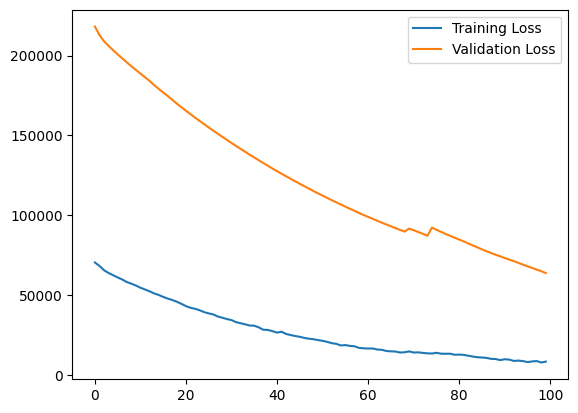

1/1 [==============================] - 0s 88ms/step


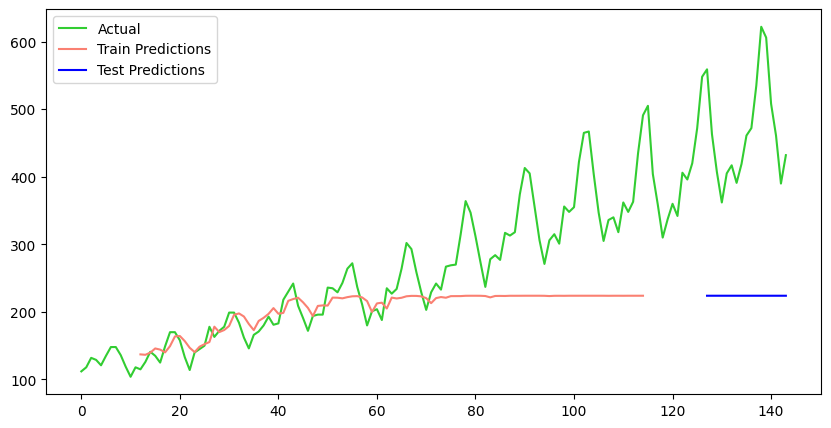

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# split the data into train and test sets
train_size = int(len(df) * 0.8) # 80% of data for training
train=df[:train_size] # 80% of data for training
test=df[train_size:] # 20% of data for testing

# create a function to prepare the data for the neural network
def prepare_data(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back):
        X.append(data[i:(i+look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# prepare the data for the neural network
look_back = 12 # number of previous time steps to use as input features
trainX, trainY = prepare_data(train[['Passengers']].values, look_back)
testX, testY = prepare_data(test[['Passengers']].values, look_back)

# create the neural network model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# train the neural network model
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2, validation_data=(testX, testY), callbacks=[early_stop])

# plot the training and validation loss over time
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# make predictions using the neural network model
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# plot the predictions
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Passengers'], color='limegreen', label='Actual')
plt.plot(train.index[look_back:], trainPredict, color='salmon', label='Train Predictions')
plt.plot(test.index[look_back:], testPredict, color='blue', label='Test Predictions')
plt.legend()
plt.show()


1/1 [==============================] - 0s 77ms/step


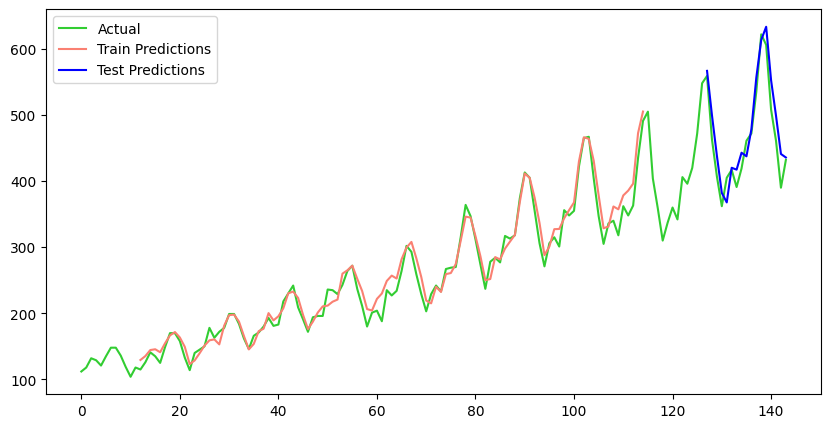

In [53]:
from keras.models import Sequential # Sequential model
from keras.layers import Dense # Dense layer type
import matplotlib.pyplot as plt # import matplotlib
import numpy as np # import numpy

# split the data into train and test sets
train_size = int(len(df) * 0.8) # 80% of data for training
train=df[:train_size] # 80% of data for training
test=df[train_size:] # 20% of data for testing

# define the number of previous time steps to use as input features
look_back = 12

# create input and output data for the neural network
X_train = []
Y_train = []
X_test = []
Y_test = []
for i in range(len(train)-look_back):
    X_train.append(train[['Passengers']].values[i:i+look_back]) # input data for the neural network
    Y_train.append(train['Passengers'].values[i+look_back]) # output data for the neural network
for i in range(len(test)-look_back):
    X_test.append(test[['Passengers']].values[i:i+look_back]) # input data for the neural network
    Y_test.append(test['Passengers'].values[i+look_back]) # output data for the neural network

# convert the input data to numpy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# create the neural network model
model = Sequential() # create a sequential model
model.add(Dense(8, input_dim=look_back, activation='relu')) # hidden layer
model.add(Dense(1)) # output layer
model.compile(loss='mean_squared_error', optimizer='adam') # compile the model

# train the neural network model
model.fit(X_train, Y_train, epochs=200, batch_size=2, verbose=0)

# make predictions using the neural network model
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# plot the predictions
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Passengers'], color='limegreen', label='Actual')
plt.plot(train.index[look_back:], trainPredict, color='salmon', label='Train Predictions')
plt.plot(test.index[look_back:], testPredict, color='blue', label='Test Predictions')
plt.legend()
